<a href="https://colab.research.google.com/github/LaxmanGhadi/ColabProjectsBeginners/blob/main/DL_Project_4_Leafdisease_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d saroz014/plant-disease

100% 1.60G/1.60G [01:25<00:00, 21.7MB/s]
100% 1.60G/1.60G [01:25<00:00, 20.0MB/s]


In [ ]:
import zipfile
zip_ref  =zipfile.ZipFile('/content/plant-disease.zip')
zip_ref.extractall('/content')
zip_ref.close()

FileNotFoundError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import keras
from tensorflow.keras.utils import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
len(os.listdir('/content/dataset/train'))

# ImageDataGenerator -> takes input of original data img and transforms the data according to the param set

In [ ]:
train_datagen = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, horizontal_flip = True,preprocessing_function= preprocess_input)
test_datagen =  ImageDataGenerator(preprocessing_function= preprocess_input)

## flow_from_directory allows you to read -(get data)from directory

In [ ]:
train  = train_datagen.flow_from_directory(directory = '/content/dataset/dataset/train', target_size = (256,256),
                                           batch_size=32)
test  = test_datagen.flow_from_directory(directory = '/content/dataset/dataset/test', target_size = (256,256),
                                           batch_size=32)

In [ ]:
train_imgs , label = train.next()

In [ ]:
# plot images on a graph
def plotImage(imageArr, label):
  for img , label in zip(imageArr, label):
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.show()

In [ ]:
plotImage(train_imgs[:3], label [ :3])

In [ ]:
from  keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape= (256, 256,3), include_top=False)

80134624/80134624 [==============================] - 4s 0us/step


Args

1.  input_shape = (width, height, depth)
2.  include_top = to include the 3 fully
  connected layers at the top of network
3.  pooling = global average pooling will be applied to the output of the last convolutional block
4.  classes: optional number of classes to classify images into,
5. Weights : 'imagenet'or path of weights folder weights






In [ ]:
for layer in base_model.layers:
  layer.trainable = False

2 types of weights
1.   trainabel =  
2.  non_trainable =
3.   layer.trainable =  False => moves all weights to non trainable

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X= Flatten()(base_model.output)
X = Dense(units  = 38, activation =  'softmax')(X)


model  =  Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer  = 'adam', loss =  keras.losses.categorical_crossentropy, metrics = ['accuracy'])

Adam is the best optimizers. If one wants to train the neural network in less time and more efficiently than Adam is the optimizer. For sparse data use the optimizers with dynamic learning rate.

categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels. The output label is assigned one-hot category encoding value in form of 0s and 1. The output label, if present in integer form, is converted into categorical encoding using keras.

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

ErStop = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.1, patience  = 3 , verbose = 1)
ModCheck = ModelCheckpoint(filepath = 'best_model.h5',
                           monitor = 'val_accuracy',
                           min_delta = 0.1, patience  = 3 ,
                           verbose = 1,
                           save_best_only = True)

Instead of going through all iterations(epochs)  where the acc val will go up and might come down we stop when the val reaches it's peak accuracy .

In [ ]:
cb = [ErStop,ModCheck]

In [ ]:
history  =  model.fit_generator(train,
                               steps_per_epoch = 16,
                               epochs = 50,
                               verbose = 1,
                               callbacks = cb,
                               validation_data = test,
                               validation_steps = 16)

<ipython-input-28-298fea299993>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history  =  model.fit_generator(train,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 28.3516 - accuracy: 0.2383
Epoch 1: val_accuracy improved from -inf to 0.52344, saving model to best_model.h5
16/16 [==============================] - 26s 775ms/step - loss: 28.3516 - accuracy: 0.2383 - val_loss: 16.6220 - val_accuracy: 0.5234
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 14.9922 - accuracy: 0.5254
Epoch 2: val_accuracy improved from 0.52344 to 0.67188, saving model to best_model.h5
16/16 [==============================] - 13s 847ms/step - loss: 14.9922 - accuracy: 0.5254 - val_loss: 10.1332 - val_accuracy: 0.6719
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 11.0018 - accuracy: 0.5723
Epoch 3: val_accuracy did not improve from 0.67188
16/16 [==============================] - 16s 990ms/step - loss: 11.0018 - accuracy: 0.5723 - val_loss: 7.7563 - val_accuracy: 0.6680
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 11.5443 - accuracy: 0.5918

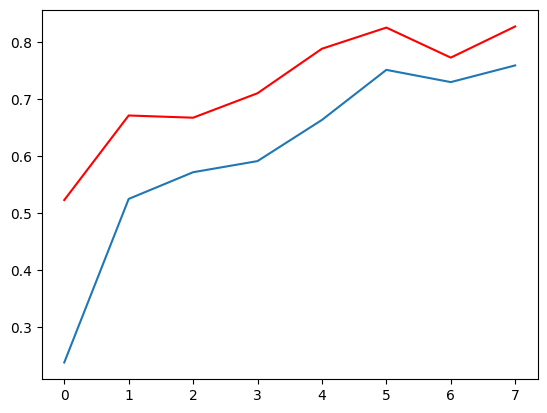

In [ ]:
his_plot  = history.history
his_plot.keys()


plt.plot(his_plot['accuracy'])
plt.plot(his_plot['val_accuracy'], c = 'red')
plt.title = ("acc vs val_acc")
plt.show()


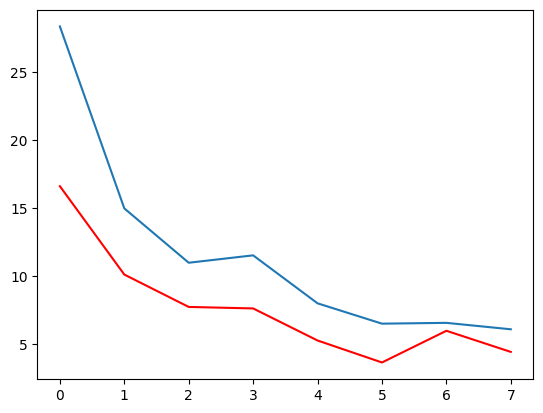

In [ ]:
plt.plot(his_plot['loss'])
plt.plot(his_plot['val_loss'], c = 'red')
plt.title = ("loss vs val_loss")
plt.show()

In [ ]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate_generator(test)[1]
print ("the acc of model = " ,{acc*100} )

<ipython-input-39-1a6b88ac5114>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test)[1]


the acc of model =  {80.54198622703552}


In [ ]:
def prediction(path):
  img  = load_img(path, target_size = (256,256) )
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis = 0)
  pred = np.argmax(model.predict(img))
  print(f"the image is of a {ref[pred]}")

In [ ]:
path = input("input the path of image ")
prediction(path)

input the path of image /content/dataset/test/Strawberry___Leaf_scorch/01d11a79-f858-4e58-9b14-c3f0619af1f7___RS_L.Scorch 0090.JPG
1/1 [==============================] - 0s 21ms/step
the image is of a Strawberry___Leaf_scorch


In [ ]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [ ]:
import pickle

In [ ]:
with open('plant_disease_detection', 'wb') as f :
  pickle.dump(model,f)